In [1]:
import torch
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[16,12]
plt.rcParams.update({'font.size':18})

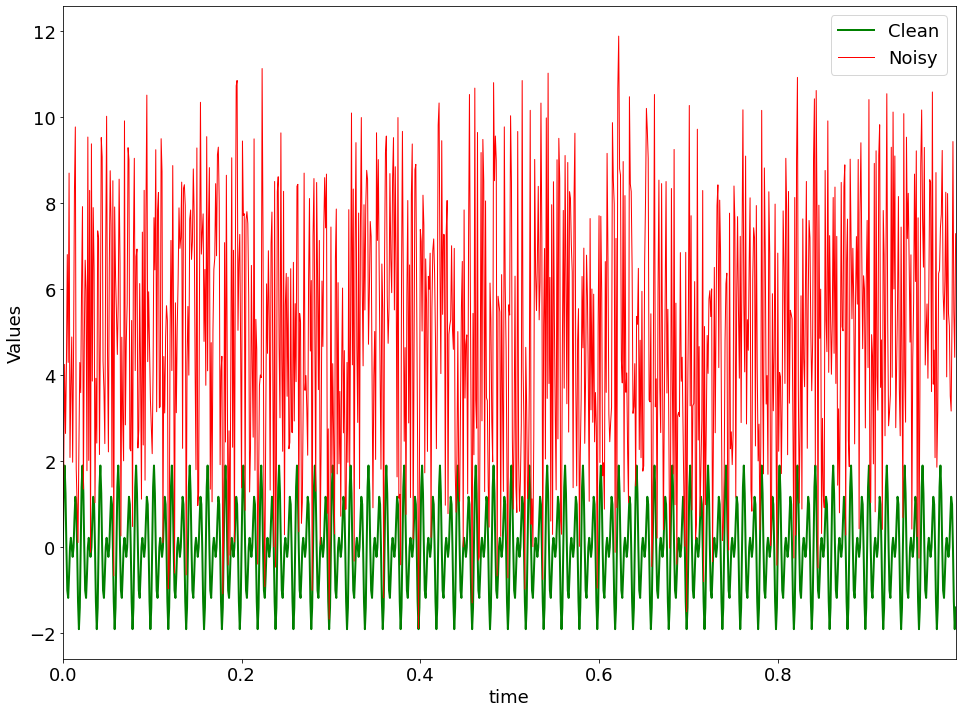

In [27]:
# creating a simple signla with two frequencies
torch.manual_seed=42
dt=0.001
t= torch.arange(0,1,dt)
# creating a function in time domain with two frequencies 100 and 150 hz
f=torch.sin(2*torch.pi*100*t) + torch.sin(2*torch.pi*150*t)
f_clean=f

#adding some noise
f=f+10*torch.rand(len(t))

#plot in time domain
plt.plot(t,f_clean,c='g',linewidth=2,label="Clean")
plt.plot(t,f,c='r',linewidth=1, label="Noisy")
plt.xlabel("time")
plt.ylabel("Values")
plt.xlim(t[0],t[-1])
plt.legend()

C:\Users\arpan\AppData\Local\Temp/ipykernel_21756/1113322663.py:9: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\Copy.cpp:250.)
  PSD=(fhat*torch.conj(fhat)/n).type(torch.float32)


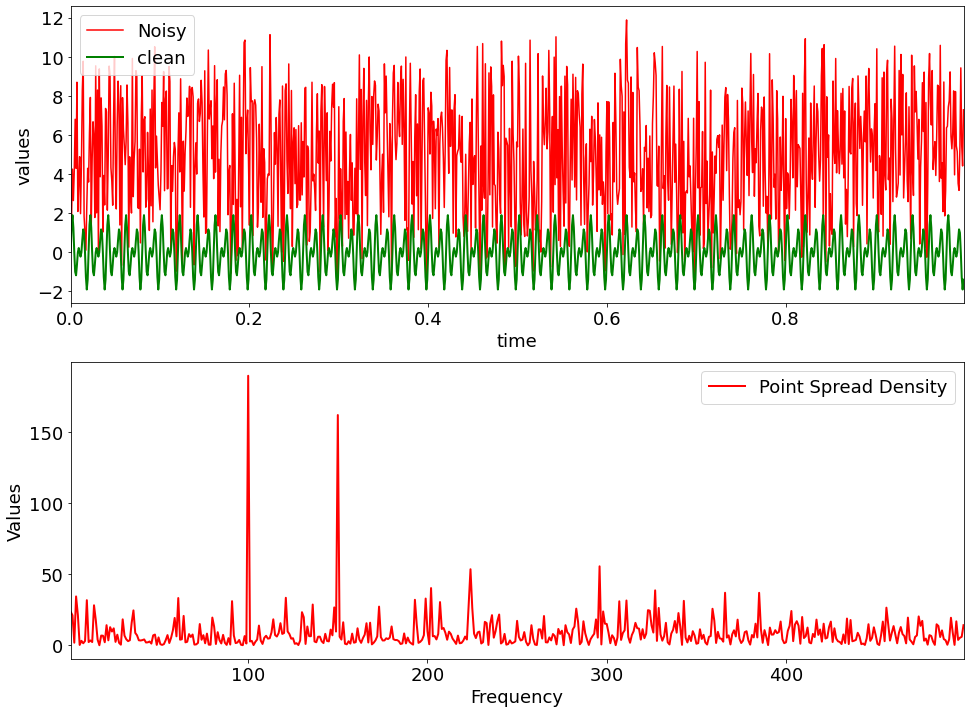

In [48]:
#compute the fast fourier transform of the f_noise
n=len(t)
#calculate fft of the noise
fhat=torch.fft.fft(f,n)
#calculate power spread distribbution 
'''PSD is the product of the fft of the function and the conjugate of the fft which gives the absolute value of the fft 
of the function
'''
PSD=(fhat*torch.conj(fhat)/n).type(torch.float32)
#convert a x-axis into the frequency domain
freq=(1/(dt*n))*torch.arange(n)

# define this to plot from the 1 to 500HZ ( half of the frequencies)
L=torch.arange(1,torch.floor(torch.tensor(n/2)),dtype=torch.long)
print
#
fig,axs=plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(t,f,color='r',linewidth=1.5,label="Noisy")
plt.plot(t,f_clean,color='g',linewidth=2,label="clean")
plt.xlim(t[0],t[-1])
plt.xlabel("time")
plt.ylabel("values")
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L],PSD[L],c='r',linewidth=2,label="Point Spread Density")
plt.xlim(freq[L[0]],freq[L[-1]])
plt.xlabel("Frequency")
plt.ylabel("Values")
plt.legend()
plt.show()

In [52]:
#threshoding on the PSD to remove the noise
#compute all freq with larger power
indicies=PSD>100
#zero out all the others
PSD_clean=PSD*indicies
#zero out small fourier coff. in y
fhat=indicies*fhat
#inverse fourier transform
ffift=torch.fft.ifft(fhat)


C:\Users\arpan\anaconda3\lib\site-packages\torch\_tensor.py:759: ComplexWarning: Casting complex values to real discards the imaginary part
  return self.numpy().astype(dtype, copy=False)


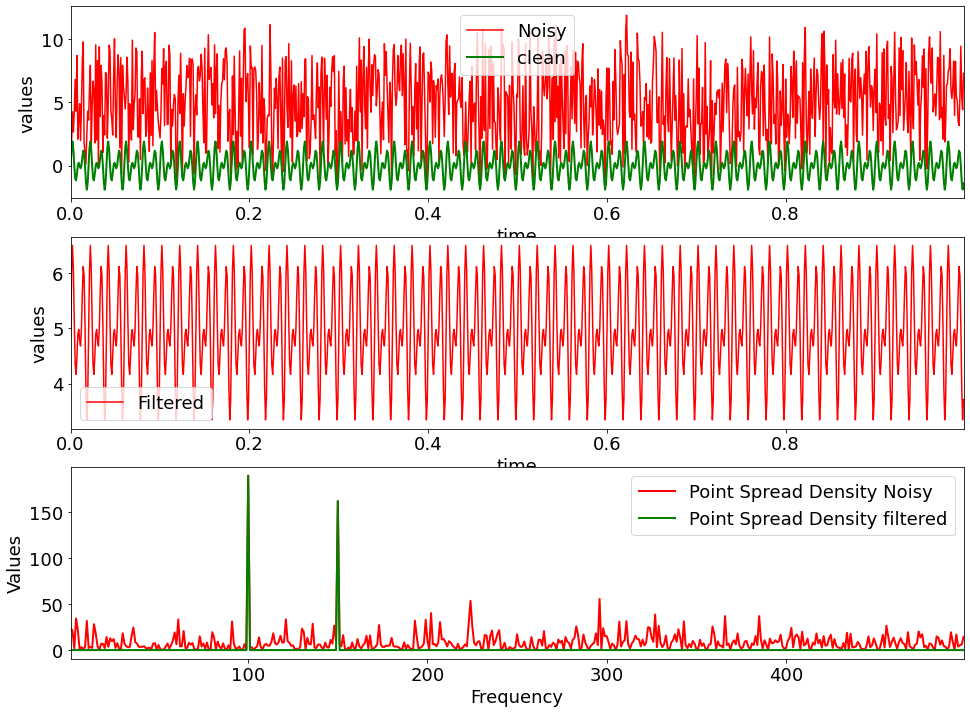

In [54]:
#plots
fig,axs=plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,f,color='r',linewidth=1.5,label="Noisy")
plt.plot(t,f_clean,color='g',linewidth=2,label="clean")
plt.xlim(t[0],t[-1])
plt.xlabel("time")
plt.ylabel("values")
plt.legend()

plt.sca(axs[1])
plt.plot(t,ffift,color='r',linewidth=1.5,label="Filtered")
plt.xlim(t[0],t[-1])
plt.xlabel("time")
plt.ylabel("values")
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L],PSD[L],c='r',linewidth=2,label="Point Spread Density Noisy")
plt.plot(freq[L],PSD_clean[L],c='g',linewidth=2,label="Point Spread Density filtered")
plt.xlim(freq[L[0]],freq[L[-1]])
plt.xlabel("Frequency")
plt.ylabel("Values")
plt.legend()
plt.show()